In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL3V6YWlyYWhtZWQvRG9jdW1lbnRzL0ZpbmFsX1BvcnRmb2xpby9Qb3J0Zm9saW9fZm9sZGVyL1BvcnRmb2xpbyBmb2xkZXIvcHl0aG9uUHJvamVjdC9EYXRhIENsZWFuaW5n'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/bl/_n6p7qqd4qz0hgy9hrycwgc40000gn/T/ipykernel_11688/3524720670.py:25: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



{"/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/importlib/_bootstrap.py": 1595261512.0, "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/importlib/_bootstrap_external.py": 1595261512.0, "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/codecs.py": 1595261510.0, "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/encodings/aliases.py": 1595261512.0, "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/encodings/__init__.py": 1595261512.0, "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/encodings/utf_8.py": 1595261513.0, "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/encodings/latin_1.py": 1595261513.0, "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/abc.py": 1595261510.0, "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/io.py": 1595261510.0, "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/stat.py": 1595261510.0, "/Library/Framewor

In [2]:
#| include: false
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itables import show
pd.set_option('display.max_columns', 500)
df = pd.read_csv("Data/train.csv")

In [3]:
#| echo: true
#| code-line-numbers: 1|2
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 1460
Columns: 81


In [4]:
#| echo: true
#| code-overflow: wrap
#| code-line-numbers: 1|2
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


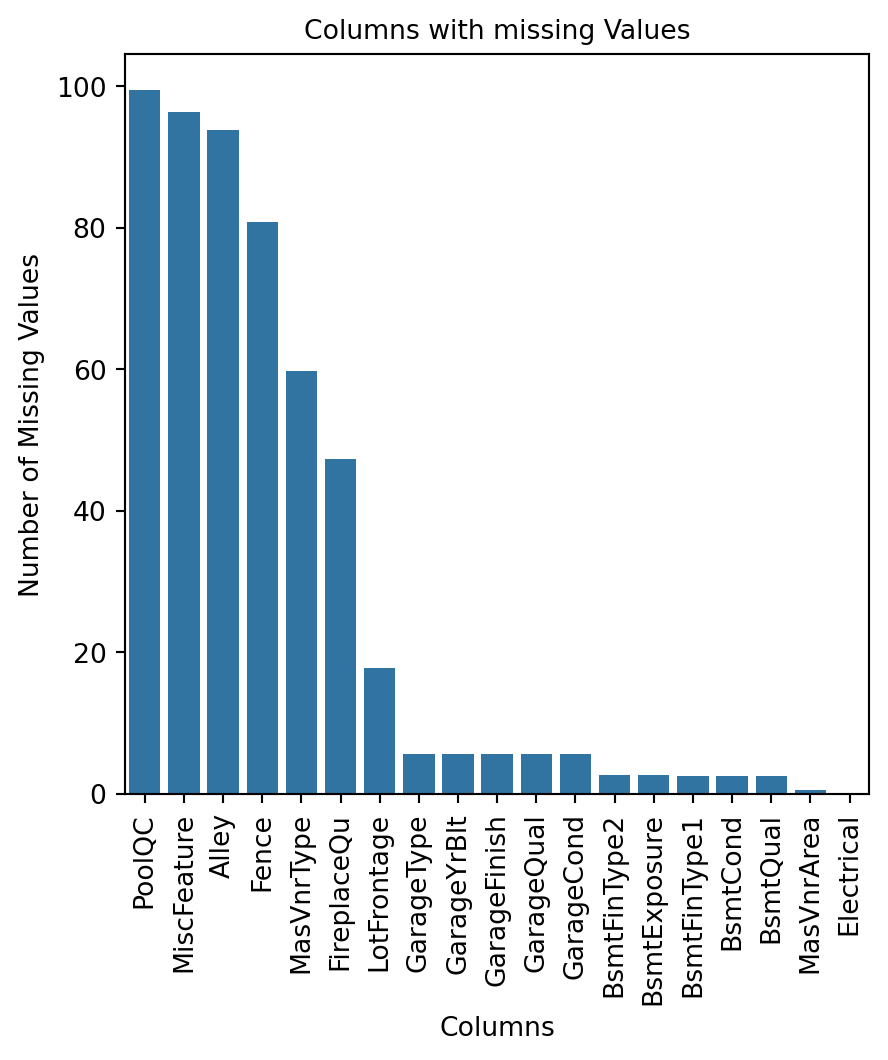

In [5]:
#| echo: true
#| output: true
#| code-overflow: wrap
missing = (df.isnull().sum() / len(df)) * 100

## Missing percentage > 0
missing = missing[missing > 0] 

## Convert to dataframe and sort values
missing_df = pd.DataFrame({'Missing Values' : missing})
missing_df = missing_df['Missing Values'].sort_values(ascending = False)

f, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=missing_df.index, y=missing_df.values, ax=ax)
plt.title('Columns with missing Values', fontsize = 10)
plt.xlabel('Columns', fontsize = 10)
plt.ylabel('Number of Missing Values', fontsize = 10)
plt.xticks(rotation = 'vertical')
plt.show()

In [6]:
#| echo: true
#| output: true

cols_to_drop = missing[missing > 60].index
df_cleaned = df.drop(columns=cols_to_drop)

# Compare the number of columns
compare_data = {
    'Dataset': ['Raw Data', 'Cleaned Data'],
    'Number of Columns': [df.shape[1], df_cleaned.shape[1]]
}

print(pd.DataFrame(compare_data))

        Dataset  Number of Columns
0      Raw Data                 81
1  Cleaned Data                 77


In [7]:
#| echo: true
#| output: true
cols = ['FireplaceQu','GarageType', 'GarageFinish',
      'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
      'MasVnrType', 'MSSubClass']
for col in cols:
    df_cleaned[col] = df_cleaned[col].fillna('None')

df_cleaned['FireplaceQu'].value_counts()

FireplaceQu
None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: count, dtype: int64

In [8]:
#| echo: true
#| output: true

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath',
           'MasVnrArea', 'GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_cleaned[col] = df_cleaned[col].fillna(0)

print(df_cleaned[cols].isnull().sum())


FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
MasVnrType      0
MSSubClass      0
dtype: int64


In [9]:
#| echo: true
#| output: true
df_cleaned["LotFrontage"] = df_cleaned.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
lot_front = df_cleaned["LotFrontage"].isnull().sum()
print(f"Neighborhoods with remaining missing LotFrontage: {lot_front}")

Neighborhoods with remaining missing LotFrontage: 0


In [10]:
#| echo: true
#| output: true
near_zero_variance_cols = []
for col in df_cleaned.select_dtypes(include='object').columns:
    value_counts = df[col].value_counts(normalize=True)
    if len(value_counts) > 0 and value_counts.iloc[0] >= 0.8:
        near_zero_variance_cols.append(col)
print(near_zero_variance_cols)

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [11]:
#| echo: true
#| output: true
df_cleaned = df_cleaned.drop(columns=near_zero_variance_cols)
compare_data = {
    'Dataset': ['Raw Data', 'Cleaned Data'],
    'Number of Columns': [df.shape[1], df_cleaned.shape[1]]
}
print(pd.DataFrame(compare_data).to_string(index=False))

     Dataset  Number of Columns
    Raw Data                 81
Cleaned Data                 57


In [12]:
#| echo: true
#| output: true
print(df_cleaned.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

In [13]:
#| echo: true
#| output: true
print(df_cleaned.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
LotShape          object
LotConfig         object
Neighborhood      object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
Foundation        object
BsmtQual          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
HeatingQC         object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64


In [14]:
#| echo: true
#| output: true
#| layout-ncol: 2
#| layout-nrow: 1
#| layout-align: center
#| layout-valign: center
cols = ["MSSubClass", "OverallCond", "YrSold", "MoSold"]
for col in cols:
    df_cleaned[col] = df_cleaned[col].astype(str)

print(df_cleaned[cols].dtypes)

MSSubClass     object
OverallCond    object
YrSold         object
MoSold         object
dtype: object


In [15]:
#| echo: true
#| output: true
df_cleaned['TotalArea'] = df_cleaned['TotalBsmtSF'] + df_cleaned['1stFlrSF'] + df_cleaned['2ndFlrSF']
df_cleaned[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotalArea']].head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,TotalArea
0,856,856,854,2566
1,1262,1262,0,2524
2,920,920,866,2706
3,756,961,756,2473
4,1145,1145,1053,3343


In [16]:
#| echo: true
#| output: true
clean_variables = {"LotShape": {"IR3": 0, "IR2": 1, "IR1": 2, "Reg": 3},
                   "ExterQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                   "ExterCond": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                   "BsmtQual": {"None": 0,"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                  "BsmtCond": {"None": 0,"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                  "BsmtExposure": {"None": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4},
                  "BsmtFinType1": {"None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6},
                  "BsmtFinType2": {"None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6},
                  "HeatingQC": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                  "KitchenQual": {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                   "FireplaceQu": {"None": 0,"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                  "GarageFinish": {"None": 0, "Unf": 1, "RFn": 2, "Fin": 3},
                  "GarageQual": {"None": 0,"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                  "GarageCond": {"None": 0,"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5},
                  "Fence": {"None": 0, "MnWw": 1, "GdWw": 2, "MnPrv": 3, "GdPrv": 4}}

df_cleaned.replace(clean_variables, inplace=True)
df_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalArea
0,1,60,RL,65.0,8450,3,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,2,2,548,0,61,0,0,0,0,0,2,2008,208500,2566
1,2,20,RL,80.0,9600,3,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,2,2,460,298,0,0,0,0,0,0,5,2007,181500,2524
2,3,60,RL,68.0,11250,2,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,2,2,608,0,42,0,0,0,0,0,9,2008,223500,2706
3,4,70,RL,60.0,9550,2,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,1,3,642,0,35,272,0,0,0,0,2,2006,140000,2473
4,5,60,RL,84.0,14260,2,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,2,3,836,192,84,0,0,0,0,0,12,2008,250000,3343


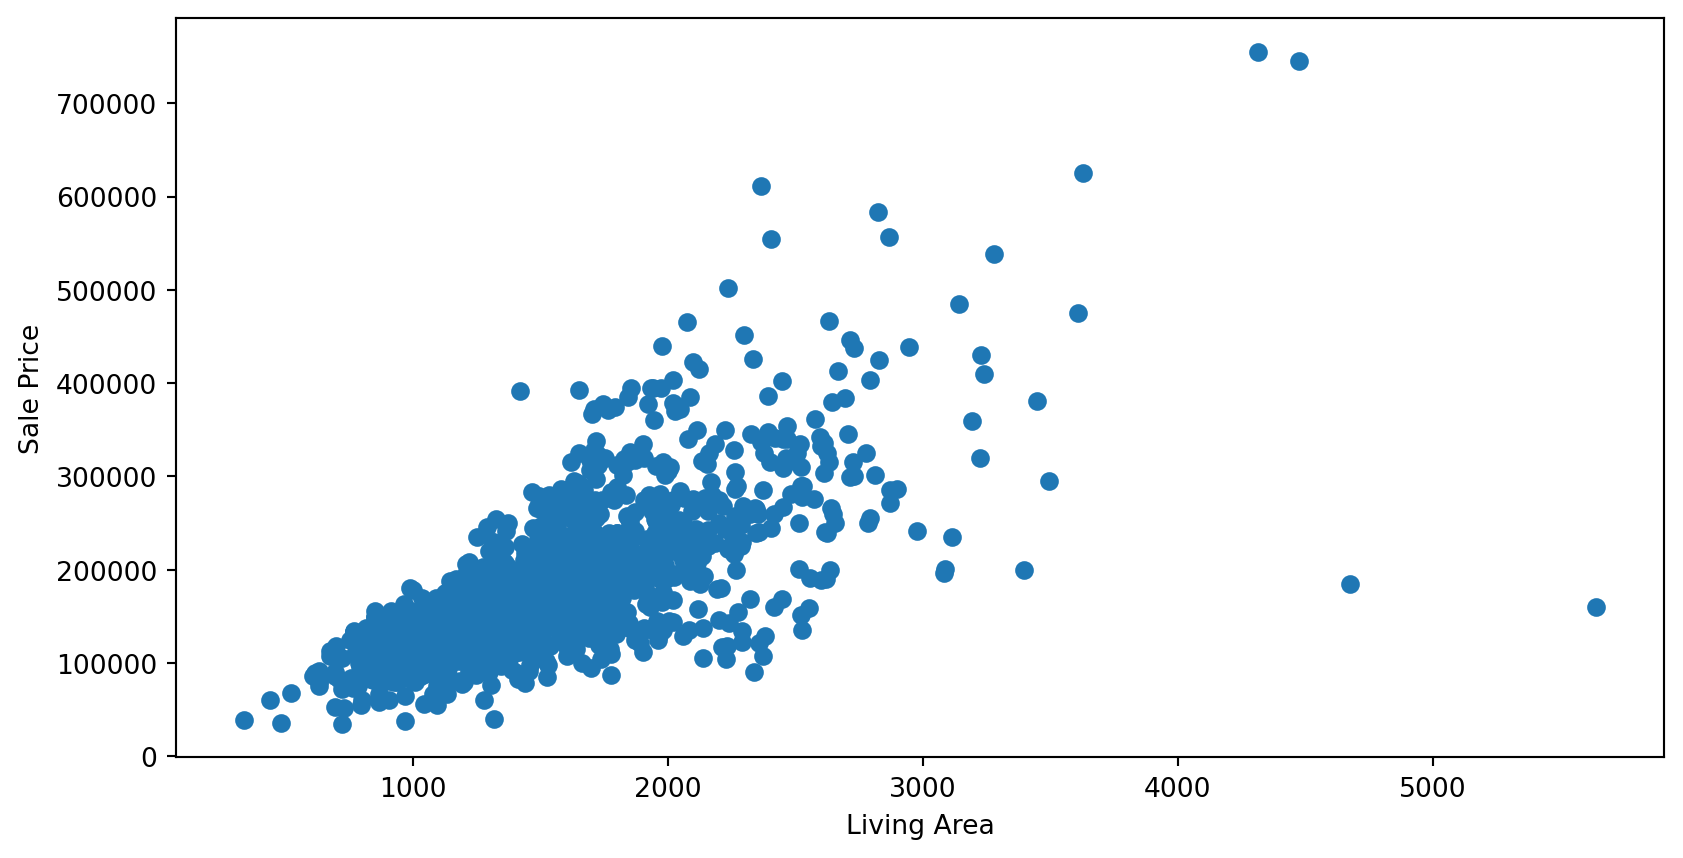

In [17]:
#| echo: true
#| output: true
plt.scatter(df_cleaned['GrLivArea'], df_cleaned['SalePrice'])
plt.xlabel('Living Area')
plt.ylabel('Sale Price')
plt.show()

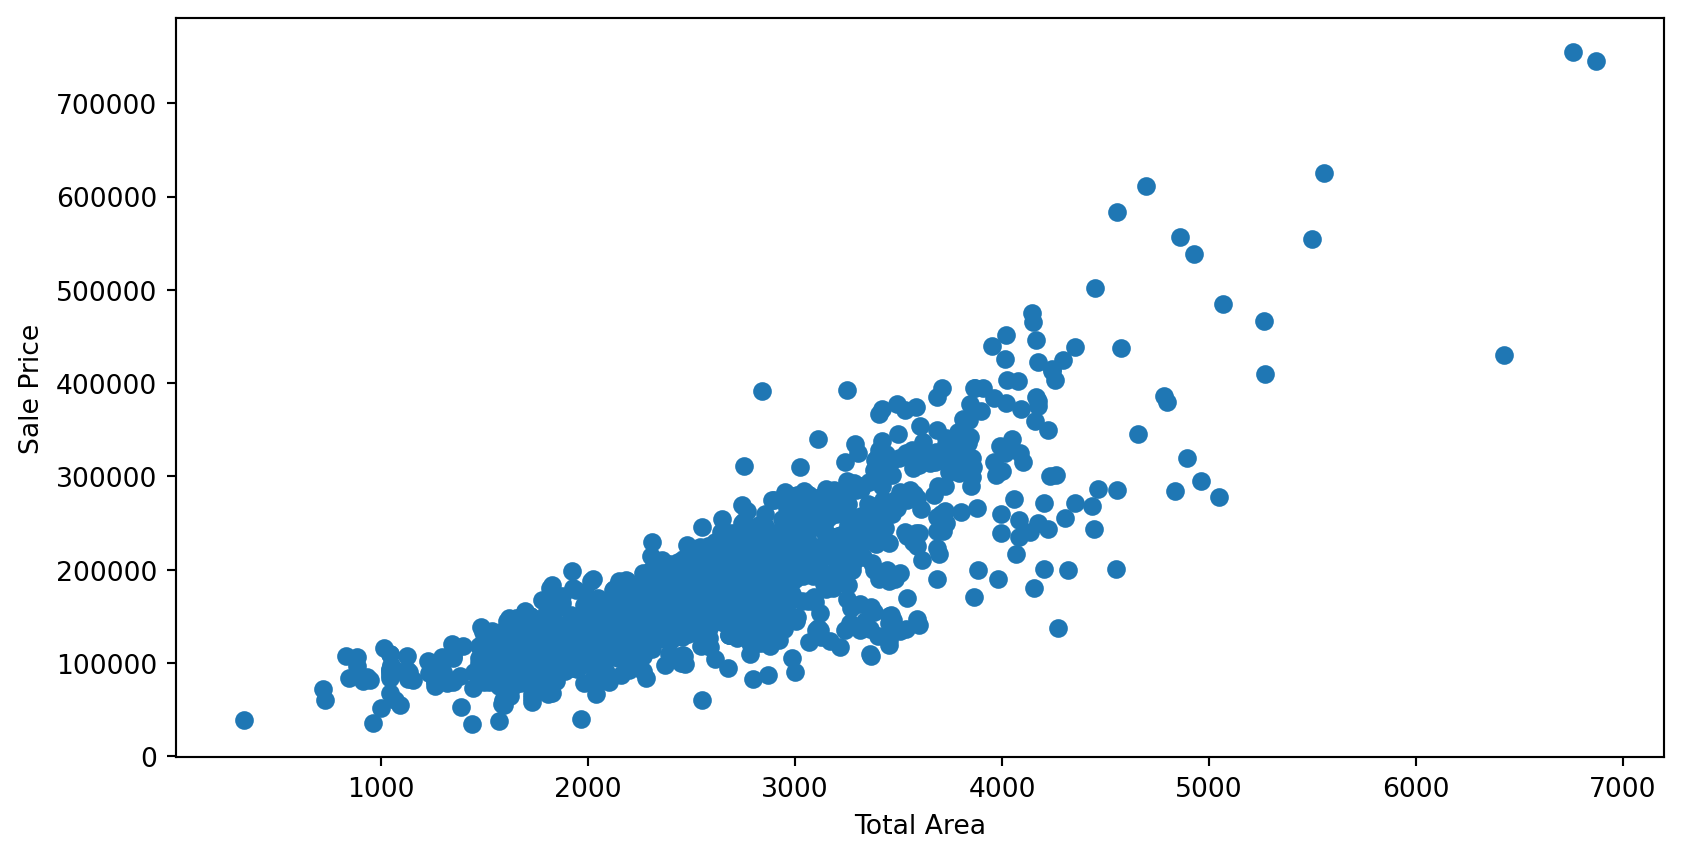

In [18]:
#| echo: true
#| output: true
df_cleaned = df_cleaned.drop(df_cleaned[(df_cleaned['GrLivArea'] > 4000) & (df_cleaned['SalePrice'] < 300000)].index)
plt.scatter(df_cleaned['TotalArea'], df_cleaned['SalePrice'])
plt.title('')
plt.xlabel('Total Area')
plt.ylabel('Sale Price')
plt.show()

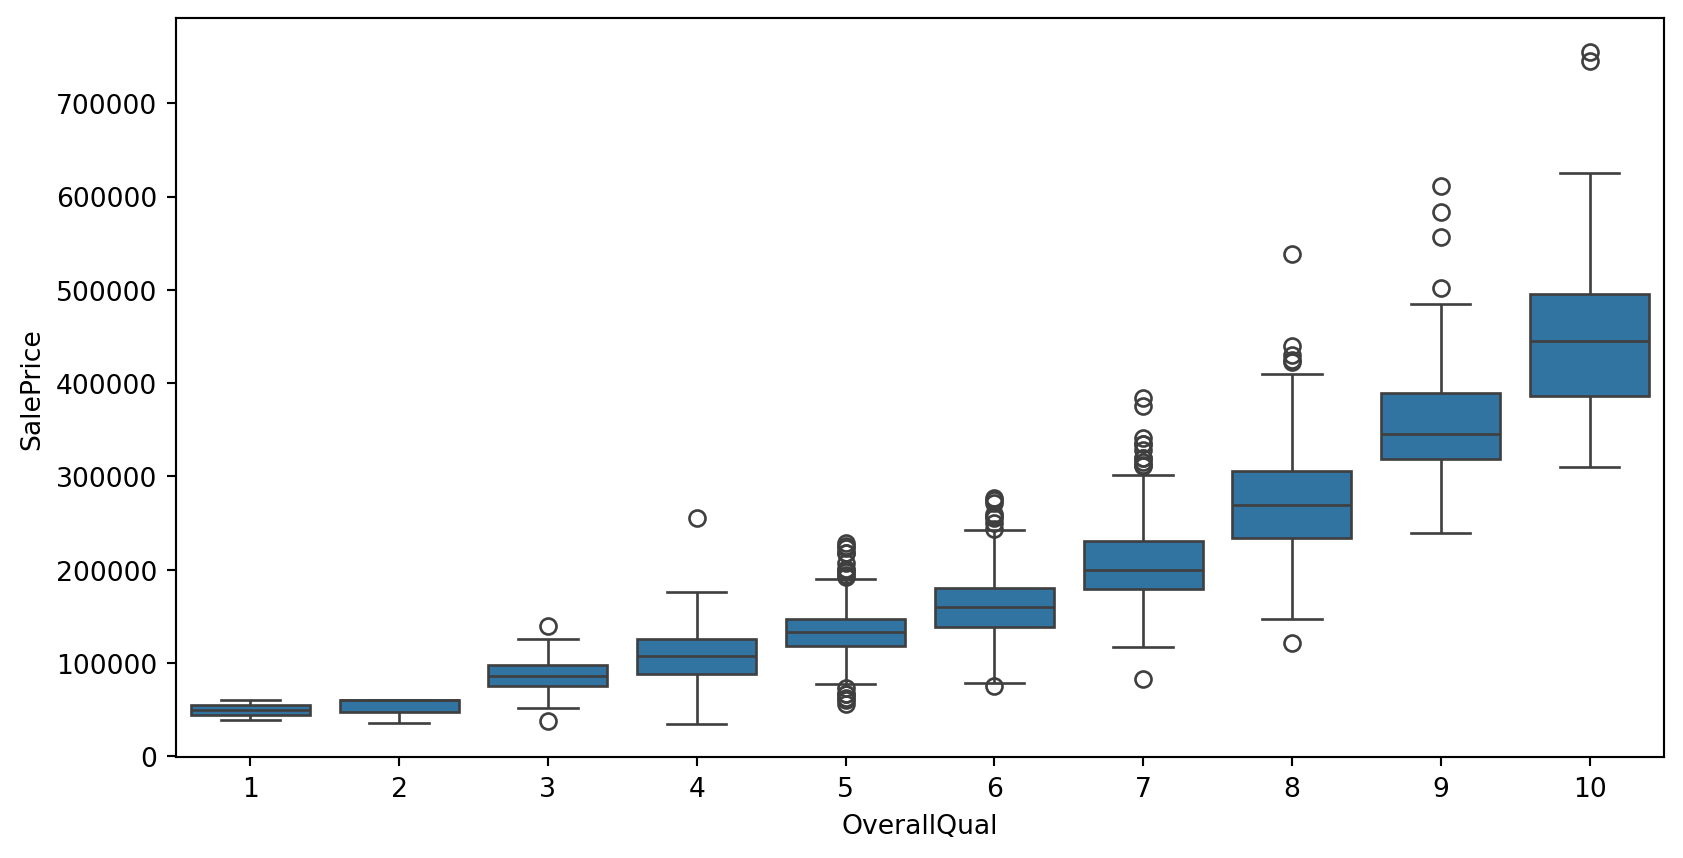

In [19]:
#| echo: true
#| output: true
sns.boxplot(x = df_cleaned['OverallQual'],
            y = df_cleaned['SalePrice'])
plt.show()

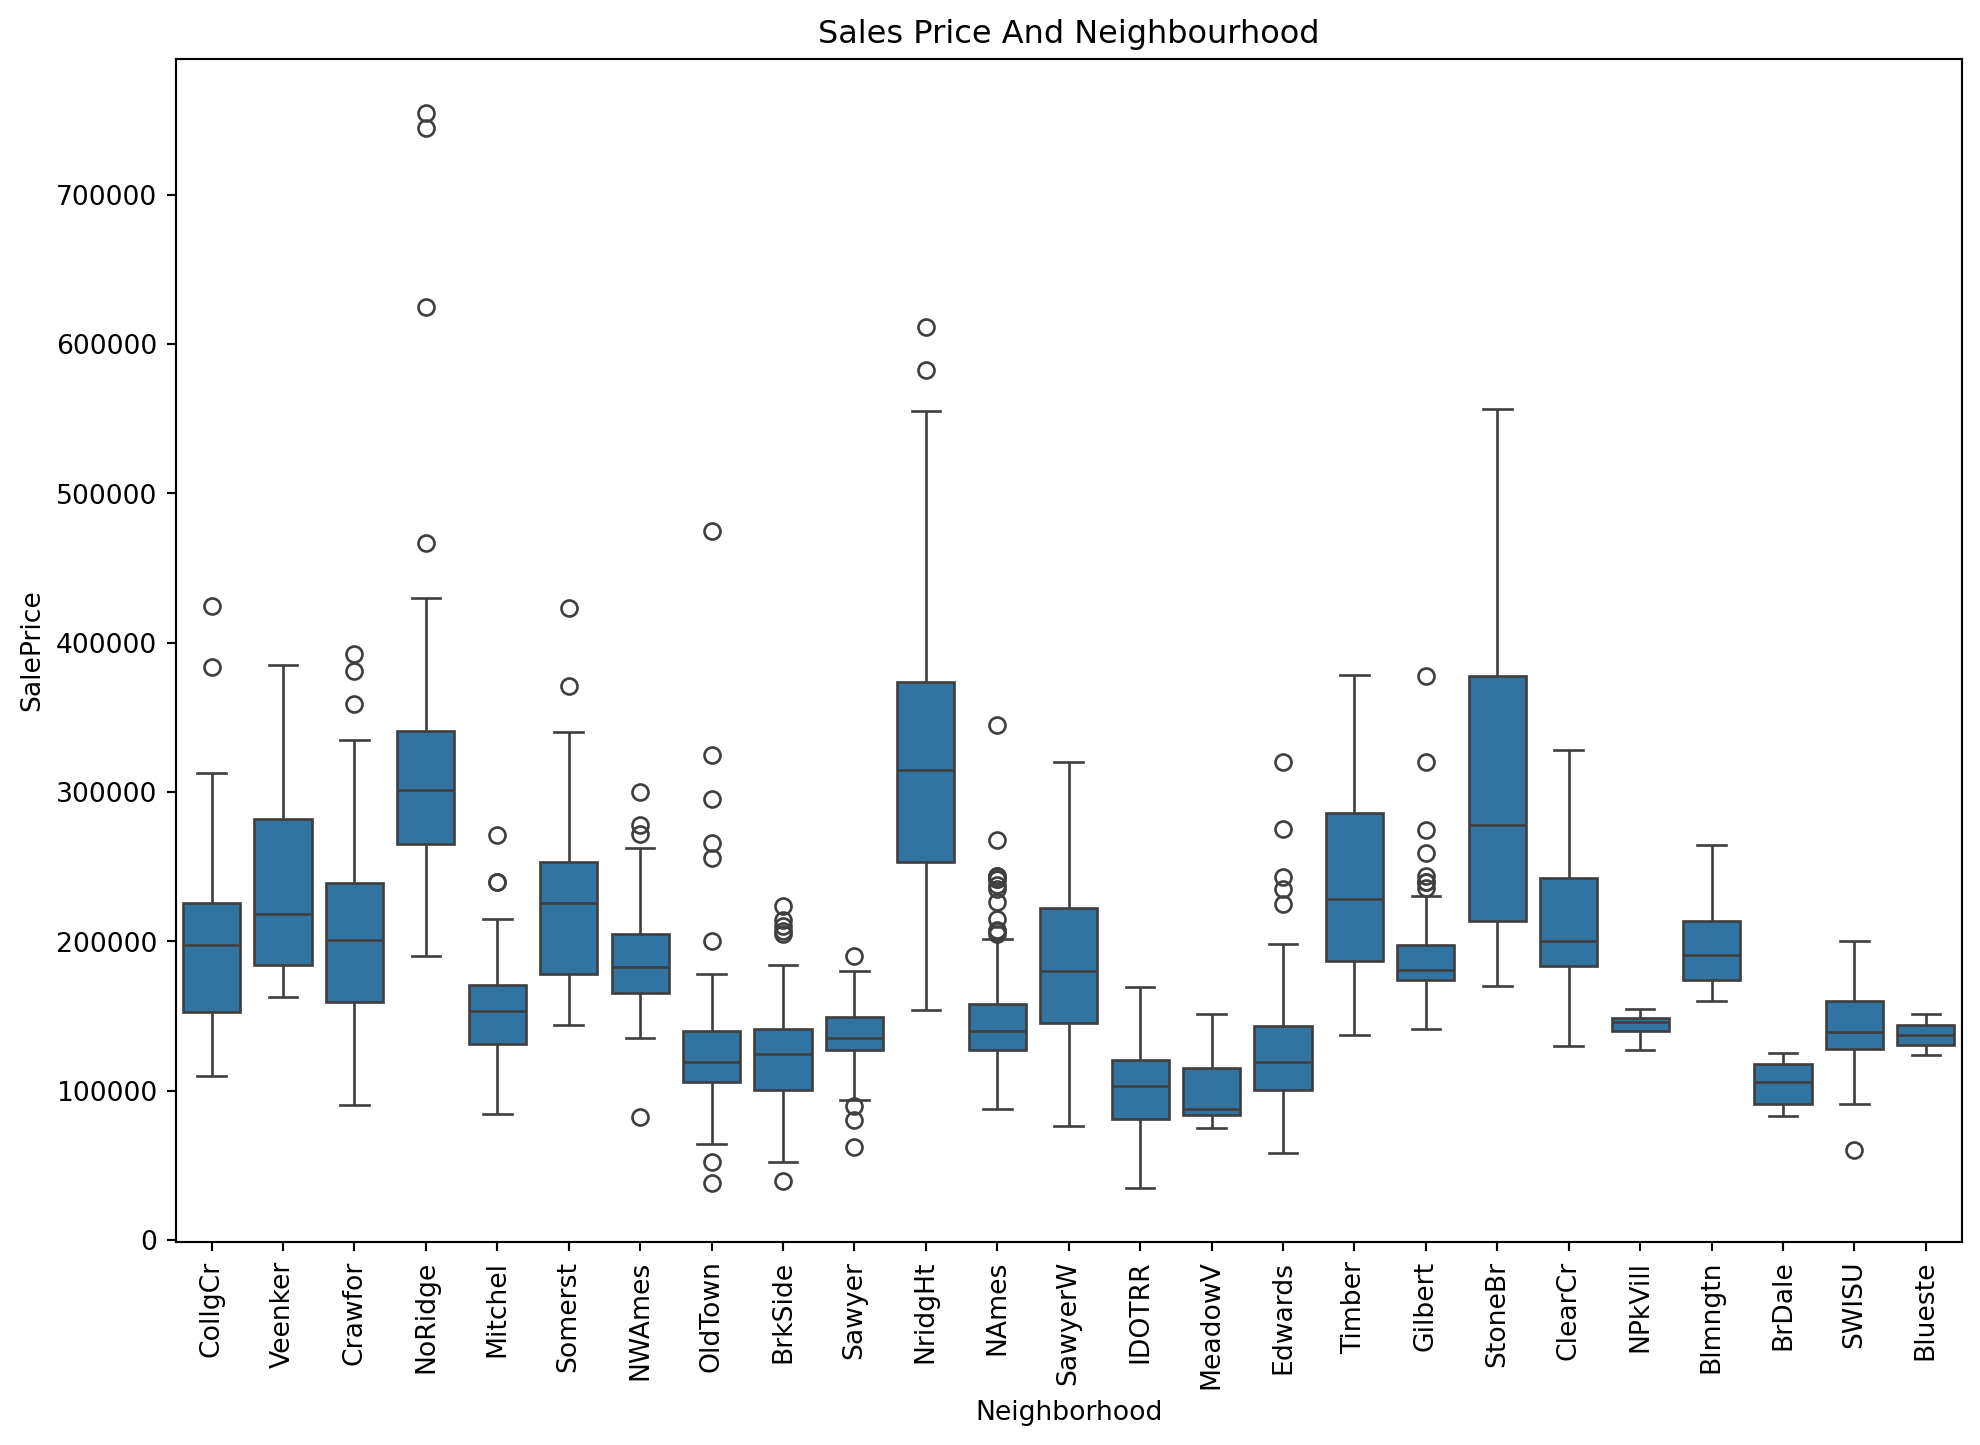

In [20]:
#| echo: true
#| output: true
plt.figure(figsize=(12, 8))
sns.boxplot(x = df_cleaned['Neighborhood'],
            y = df_cleaned['SalePrice'])
plt.title('Sales Price And Neighbourhood')
plt.xticks(rotation = 90)
plt.show()

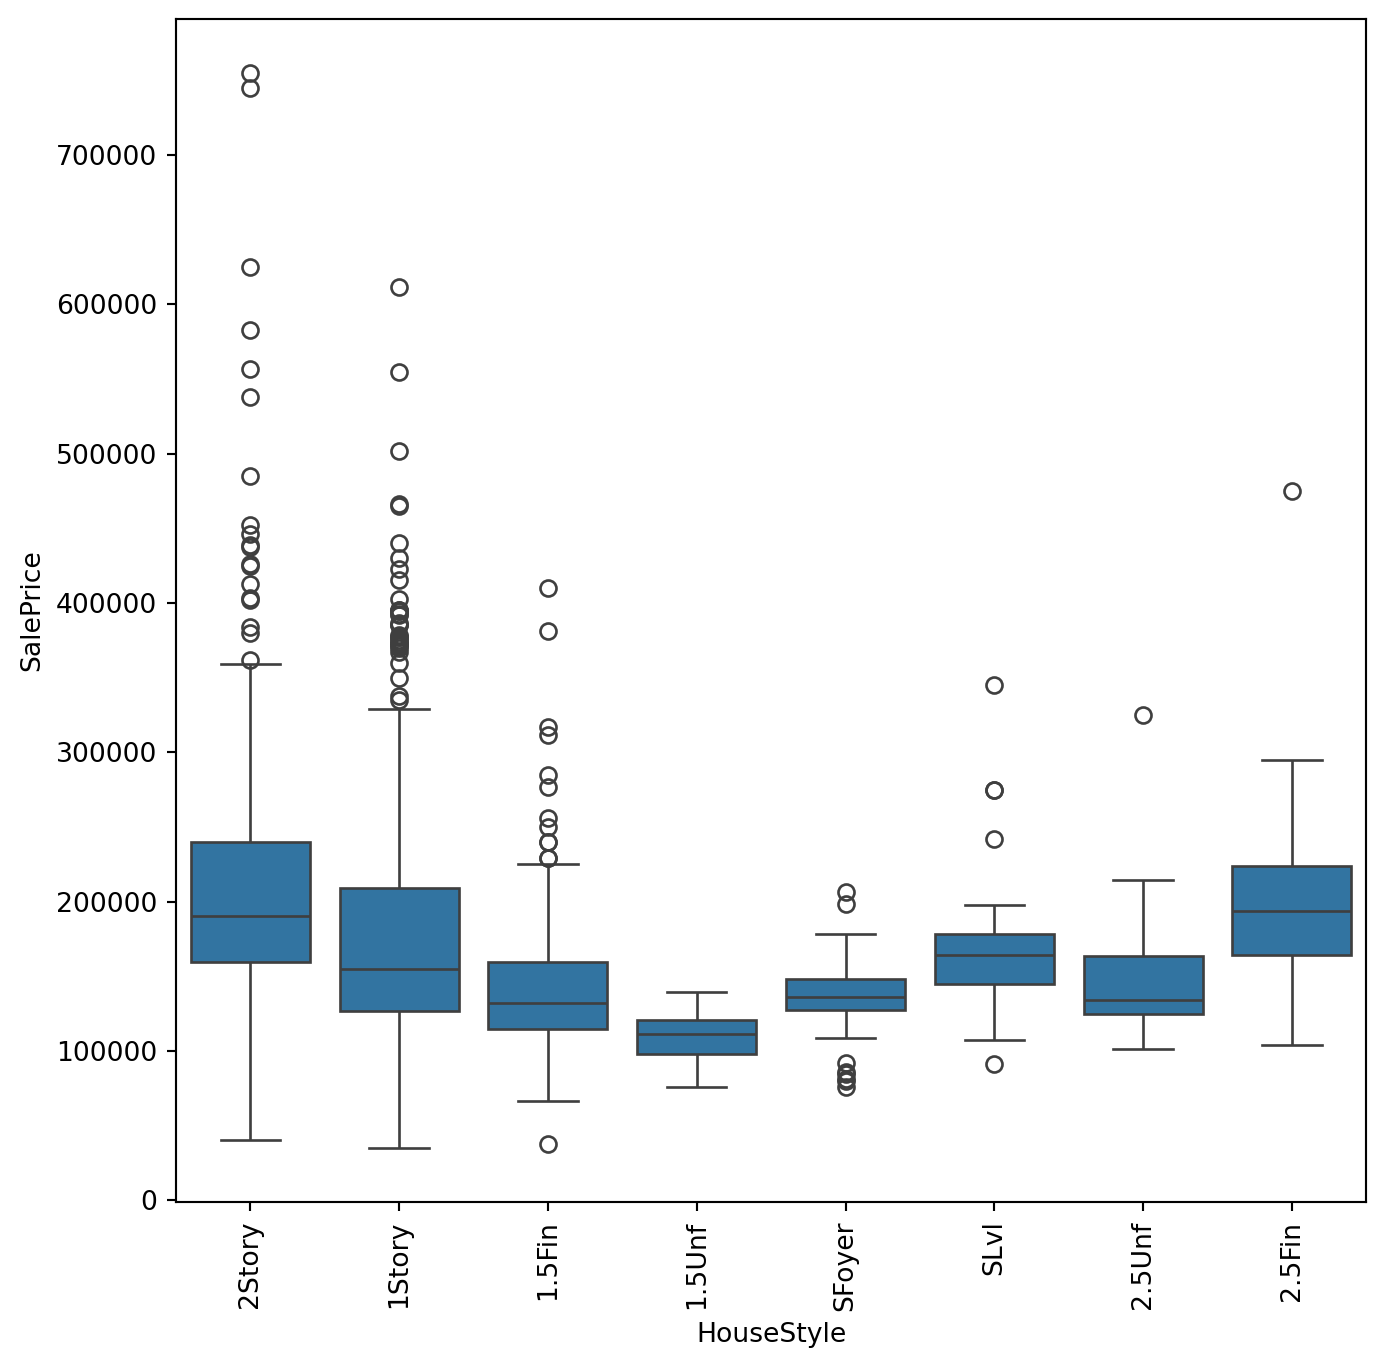

In [21]:
#| echo: true
#| output: true
plt.figure(figsize=(8, 8))
sns.boxplot(x = df_cleaned['HouseStyle'],
            y = df_cleaned['SalePrice'])
plt.xticks(rotation = 90)
plt.show()

In [22]:
#| echo: true
#| output: true
houses_sold_per_neighborhood = df_cleaned.groupby('Neighborhood').size().reset_index(name='Number of Houses Sold')

average_price_per_neighborhood = df_cleaned.groupby('Neighborhood')['SalePrice'].mean().reset_index(name='Average Sale Price')

neighborhood_sales_summary = pd.merge(houses_sold_per_neighborhood, average_price_per_neighborhood, on='Neighborhood')

show(neighborhood_sales_summary, scrollY="500px", scrollCollapse=True, paging=False, buttons=["copyHtml5", "csvHtml5", "excelHtml5"], classes="display nowrap table_with_monospace_font", searching=False)

In [23]:
#| echo: true
#| output: true
df_exp = df_cleaned.sort_values(by='SalePrice', ascending=False)

top_10_exp = df_exp.head(10)
top_10_exp = top_10_exp.reset_index(drop=True)
# Display the top 10 most expensive houses using itables
show(top_10_exp,
     scrollY="400px",
     scrollCollapse=True,
     paging=False,
     classes="display compact cell-border",
     caption="Top 10 Most Expensive Houses",
     index=False,
     buttons=["copyHtml5", "csvHtml5", "excelHtml5"])

In [24]:
show(df,
     scrollY="400px",
     scrollCollapse=True,
     paging=False,
     classes="display compact cell-border",
     caption="View of raw data",
     index=False,
     buttons=["copyHtml5", "csvHtml5", "excelHtml5"])

In [25]:
show(df_cleaned.reset_index(drop=True),
     scrollY="400px",
     scrollCollapse=True,
     paging=False,
     classes="display compact cell-border",
     caption="View of cleaned data",
     index=False,
     buttons=["copyHtml5", "csvHtml5", "excelHtml5"])